# Buyer
## High budget, wants to show off, timing within a month, waterfront, renovated, high grades year

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/King_County_House_prices_dataset.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [6]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
#df = df.astype({'sqft_basement': float})
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Hypothesis

- How many houses have waterfront? and how expensive are the houses with waterfront ? 
- Does higher grades have higher prices ?
- With resonable grade and waterfront, house can be bought 


In [9]:
# replacing the '?' with NaN
df['sqft_basement'] = df.sqft_basement.replace('?',np.NaN)
# now changing the data type from object/string to float
df = df.astype({'sqft_basement': float})
df.sqft_basement.dtypes

dtype('float64')

In [12]:
df.head()
df.shape

(21597, 21)

In [13]:
wf_list = df.where(df['waterfront']!= 0).sort_values('price', ascending = False)
wf_list

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3910,9.808701e+09,2014-06-11,7060000.0,5.0,4.50,10040.0,37325.0,2.0,1.0,2.0,...,11.0,7680.0,2360.0,1940.0,2001.0,98004.0,47.6500,-122.214,3930.0,25449.0
1313,7.558700e+09,2015-04-13,5300000.0,6.0,6.00,7390.0,24829.0,2.0,1.0,NaN,...,12.0,5000.0,2390.0,1991.0,0.0,98040.0,47.5631,-122.210,4320.0,24619.0
1162,1.247600e+09,2014-10-20,5110000.0,5.0,5.25,8010.0,45517.0,2.0,1.0,4.0,...,12.0,5990.0,2020.0,1999.0,0.0,98033.0,47.6767,-122.211,3430.0,26788.0
8085,1.924059e+09,2014-06-17,4670000.0,5.0,6.75,9640.0,13068.0,1.0,1.0,4.0,...,12.0,4820.0,4820.0,1983.0,2009.0,98040.0,47.5570,-122.210,3270.0,10454.0
2624,7.738501e+09,2014-08-15,4500000.0,5.0,5.50,6640.0,40014.0,2.0,1.0,4.0,...,12.0,6350.0,290.0,2004.0,0.0,98155.0,47.7493,-122.280,3030.0,23408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21592,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21593,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21594,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
wf1_list = wf_list.query('waterfront == 1.0')

In [38]:
wf1_list.shape

(146, 21)

In [39]:
test_list = wf_list.dropna(subset = ['waterfront'])

# Plots

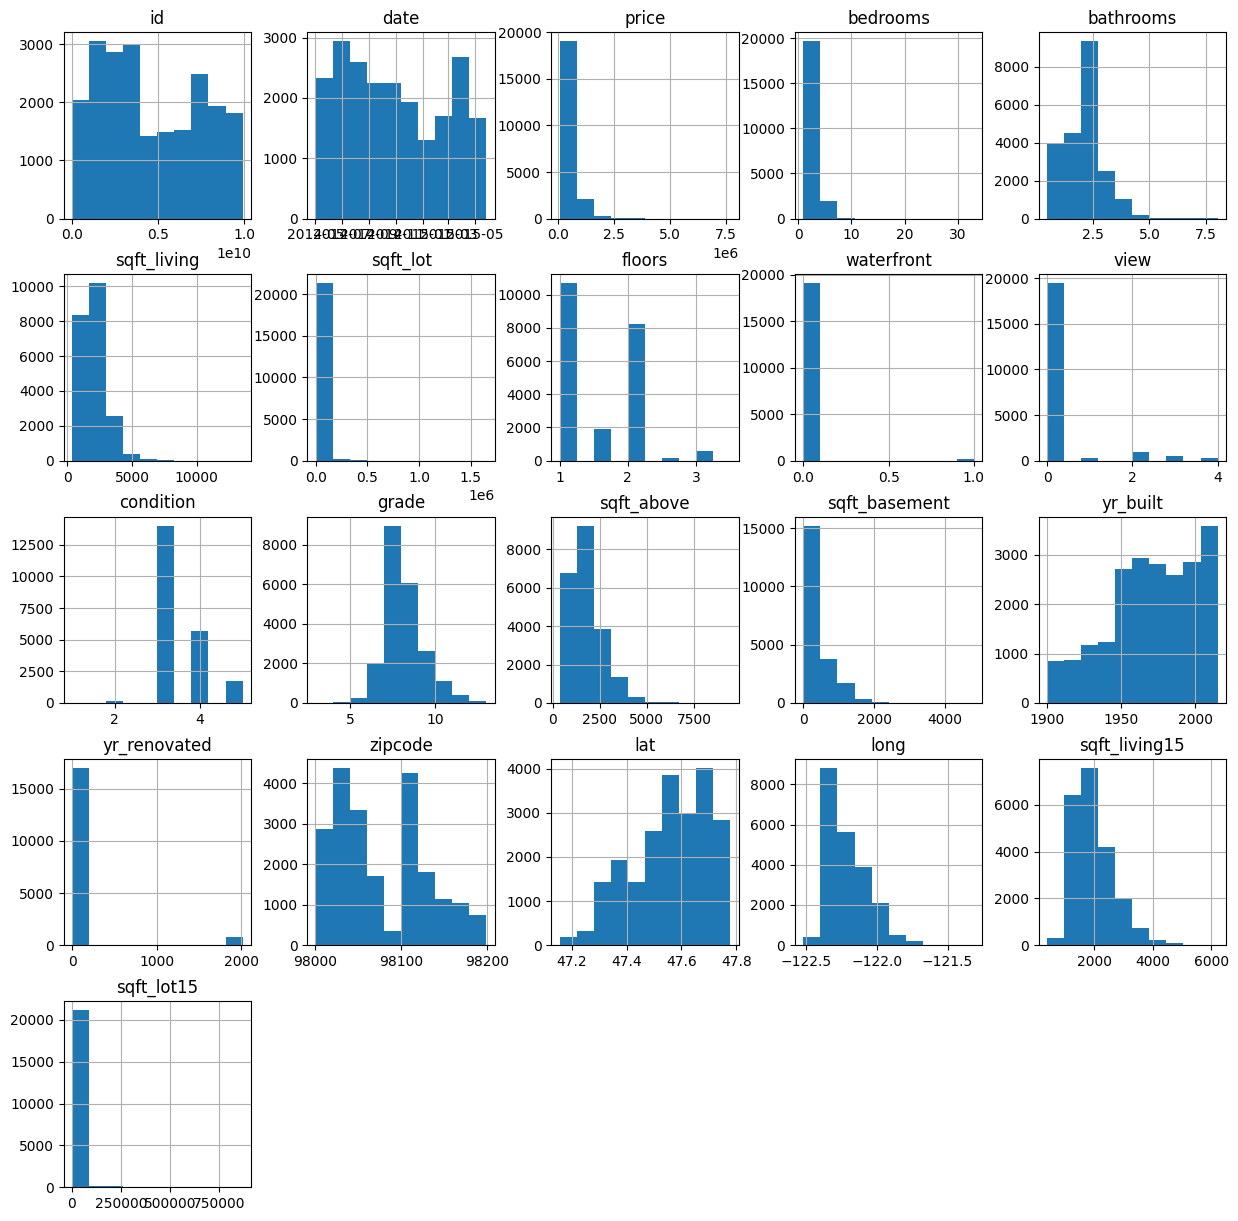

In [64]:
df.hist(figsize=(15,15))
plt.show()

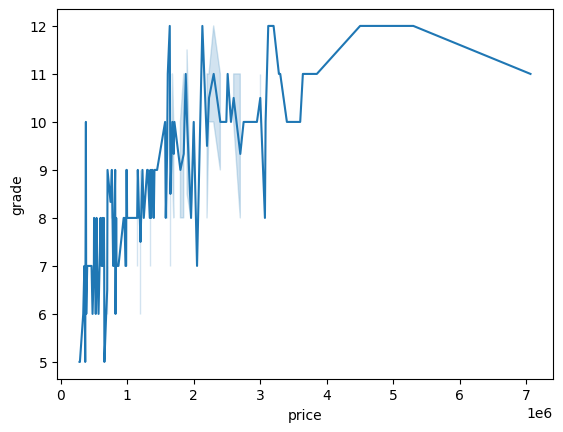

In [75]:
sns.lineplot(data=wf1_list, x="price", y="grade");

In [98]:
#wf1_list[['price,yr_renovated']].groupby(['price','yr_renovated']).size()
#wf1_list.yr_renovated
wf1_list = wf1_list.astype({'yr_renovated': int})
wf1_list.yr_renovated.dtypes

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

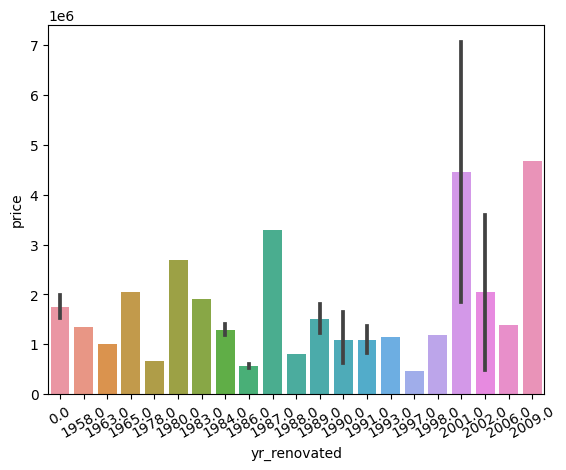

In [95]:
sns.barplot(data=wf1_list, x="yr_renovated", y="price");
plt.xticks(rotation=30);

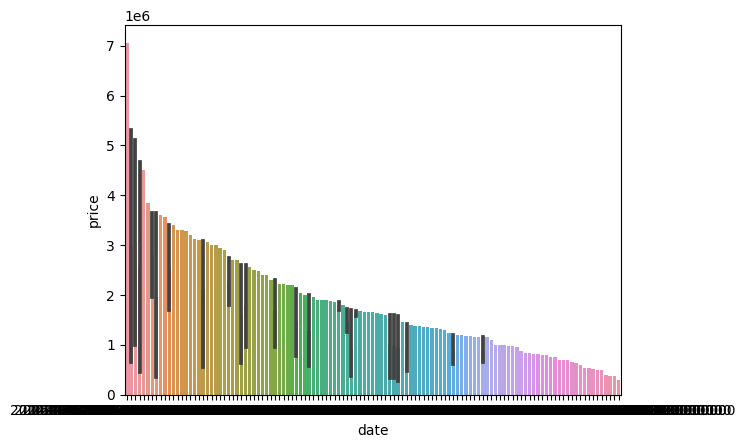

In [102]:
sns.barplot(data=wf1_list, x="date", y="price");

In [41]:
import plotly.express as px

In [60]:
fig = px.scatter_geo(df, lat ='lat',lon='long', hover_name="price", color = 'waterfront')
fig.update_layout(title = 'Total data of price with waterfront', title_x=0.5)
fig.show()

In [61]:
fig = px.scatter_geo(wf1_list, lat ='lat',lon='long', hover_name="waterfront", color = 'grade', size = 'price')
fig.update_layout(title = 'Prices of the houses with grade', title_x=0.5)
fig.show()

In [85]:
# correlation matrix between these variables
corr_columns=["price", "grade", "yr_renovated","waterfront"]
corr_mtrx=df[corr_columns].corr()
corr_mtrx

,price,grade,yr_renovated,waterfront
price,1.000000,0.667951,0.129599,0.276295
grade,0.667951,1.000000,0.016669,0.087383
yr_renovated,0.129599,0.016669,1.000000,0.087244
waterfront,0.276295,0.087383,0.087244,1.000000


In [109]:
wf2 = wf1_list.dropna(subset=['yr_renovated'])


In [115]:
wf2[['date','yr_renovated']].sort_values('yr_renovated',ascending=False).head(20)

,date,yr_renovated
8085,2014-06-17,2009.0
3930,2014-07-23,2006.0
1947,2015-04-20,2002.0
2862,2014-11-18,2002.0
3910,2014-06-11,2001.0
4758,2014-08-14,2001.0
11103,2014-05-28,1998.0
14813,2014-06-17,1997.0
4365,2014-11-21,1993.0
5755,2014-07-17,1991.0


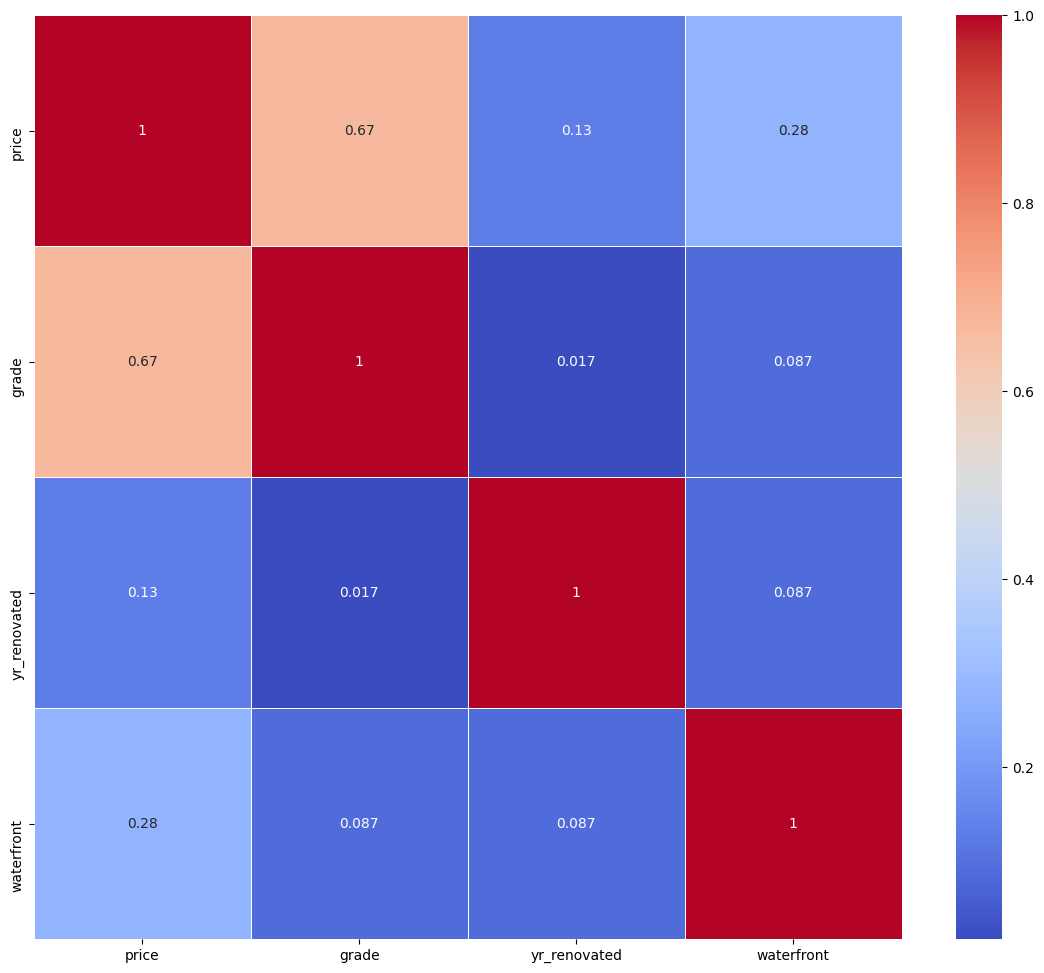

In [86]:
# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')